In [1]:
import numpy as np
import sklearn.linear_model
import sklearn.metrics
import pandas as pd

In [2]:
ds = pd.read_csv("data/covtype/covertype_csv.csv")
ds.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,5
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,5
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,2
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,2
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,5


In [3]:
ds.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [4]:
# only use a random subset for speed - pretend the rest of the data doesn't exist
random_sample = np.random.choice(len(ds), len(ds) // 10)

COVER_TYPE = 3
ds = ds.loc[random_sample]
features = ds.iloc[:, :-1]
target = ds.iloc[:, -1] == COVER_TYPE

In [5]:
target.value_counts()

False    54409
True      3692
Name: class, dtype: int64

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, stratify=target)
r_forest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
r_forest.fit(X_train, y_train)
y_predict = r_forest.predict(X_test)

print("Precision: "+str(precision_score(y_predict, y_test)))
print("Recall: "+str(recall_score(y_predict, y_test)))
print("F1 score: "+str(f1_score(y_predict, y_test)))

/home/krazy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision: 0.7859078590785907
Recall: 0.8761329305135952
F1 score: 0.8285714285714285


In [7]:
important_features = r_forest.feature_importances_
indices = np.argsort(important_features)[::-1]

for i in range(20): 
  print("%d. %s (%f)" % (i + 1, features.columns[indices[i]], important_features[indices[i]]))

print ("\nMean Feature Importance %.6f" %np.mean(important_features))

import matplotlib.pyplot as plt
indices=indices[:10] 
plt.figure() 
plt.title("Top 10 Feature importances") 
plt.bar(range(10), important_features[indices], color="br") 
plt.xticks(range(10), ds.columns[indices], fontsize=14, rotation=90) 
plt.show()

1. Elevation (0.230587)
2. Wilderness_Area1 (0.177047)
3. Wilderness_Area4 (0.110157)
4. Soil_Type2 (0.051073)
5. Horizontal_Distance_To_Roadways (0.050972)
6. Soil_Type4 (0.048168)
7. Soil_Type29 (0.035321)
8. Slope (0.031313)
9. Soil_Type33 (0.027812)
10. Horizontal_Distance_To_Fire_Points (0.026689)
11. Aspect (0.022983)
12. Horizontal_Distance_To_Hydrology (0.022854)
13. Soil_Type10 (0.018576)
14. Hillshade_3pm (0.014202)
15. Vertical_Distance_To_Hydrology (0.014157)
16. Hillshade_Noon (0.013729)
17. Soil_Type32 (0.012973)
18. Hillshade_9am (0.012803)
19. Wilderness_Area3 (0.011811)
20. Soil_Type6 (0.009574)

Mean Feature Importance 0.018519


<Figure size 640x480 with 1 Axes>

In [8]:
features.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,...,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000
mean,0.550517,0.431896,0.213838,0.193142,0.283570,0.330614,0.834850,0.879893,0.562202,0.275743,...,0.043855,0.091100,0.078123,0.002771,0.003666,0.000172,0.000447,0.027401,0.023201,0.014062
std,0.139901,0.310231,0.113317,0.152398,0.075517,0.219935,0.105206,0.077944,0.151114,0.184648,...,0.204773,0.287754,0.268367,0.052568,0.060437,0.013118,0.021150,0.163249,0.150543,0.117746
min,0.009005,0.000000,0.000000,0.000000,0.011628,0.000000,0.000000,0.118110,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474237,0.161111,0.136364,0.077309,0.232558,0.155122,0.779528,0.838583,0.472441,0.142479,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.569785,0.352778,0.196970,0.156049,0.262274,0.280174,0.854331,0.889764,0.562992,0.237836,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.652326,0.719444,0.272727,0.274875,0.312661,0.467894,0.909449,0.937008,0.665354,0.355082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.969697,0.950608,0.994832,0.994520,1.000000,1.000000,0.996063,0.989684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Being not much knowledge on domain, with the names of features hillshade seems interesting.
I understand that if there's a sun at 9am in morning then there must be sun at noon and at 3pm also, 
if not then something must be wrong.

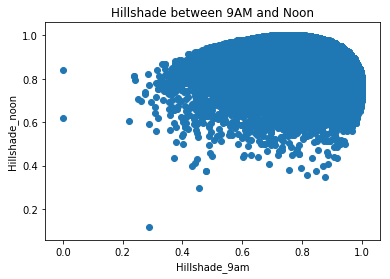

In [9]:
plt.title("Hillshade between 9AM and Noon")
plt.xlabel("Hillshade_9am")
plt.ylabel("Hillshade_noon")
plt.scatter(x=features.Hillshade_9am, y=features.Hillshade_Noon)
plt.show()



Looks fine to me. Only one point is a problem when Hillshade_noon = 0 and Hilshade_9am ~= 0.62

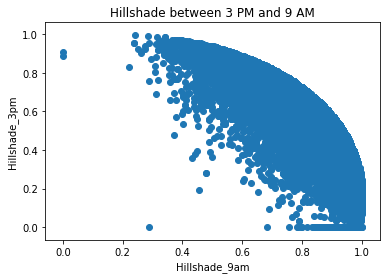

In [10]:
plt.title("Hillshade between 3 PM and 9 AM")
plt.xlabel("Hillshade_9am")
plt.ylabel("Hillshade_3pm")
plt.scatter(x=features.Hillshade_9am, y=features.Hillshade_3pm)
plt.show()

It looks little fishy. If at 9 AM there's a shade, then at 3 PM also there must be shade. 
Here, a lot of points have 0 hillshade value at 3 pm.

In [11]:
ind_3 = features[(features.Hillshade_3pm == 0) & (features.Hillshade_9am > 0)].index
target[ind_3].value_counts()

False    152
True      28
Name: class, dtype: int64

Random Forest Classifier gives use the detail of best features that it used to classify.
Usually not all features are useful, choosing best features is one the most time taking job in Data science.
Few tricks that I use to select features :-
1. Many a times we handpick the features by understanding the problem domain. In this case Elevation and Hillshade. 
2. Use scatter plots, box plots to check the distribution of data with respect to target variable
3. Look for correlation. 
4. Use regression, tree based algorithm to find the most important features. Tree algorithm employs Information gain and Gain ratio for splitting the tree based on information seen in the data. (In our dataset, data is pretty clean and without doing any pre-processing we can model Tree. It will give the initial idea on the useful features)
5. We can also use Backward or Forward feature elimination technique. These techniques CPU and time intensive job because they do all permutation and combinations of of features to look for best features. 

**For this task, I am using tree based methods**

#### Imlementing Lasso Regression for feature importance

In [12]:
from sklearn.linear_model import LassoCV

lasso = LassoCV()
lasso.fit(features, target)
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)
print("Best score using built-in LassoCV: %f" % lasso.score(features, target))
coef = pd.Series(lasso.coef_, index = features.columns)

/home/krazy/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.000034
Best score using built-in LassoCV: 0.531252


We have got very less value of Alpha. Nice !!!
Regularization is used to penalize complexity of the model and therefore higher the alpha, 
we get less complex model, decreasing the error due to variance (overfit). 

Text(0.5, 1.0, 'Feature importance using Lasso Model')

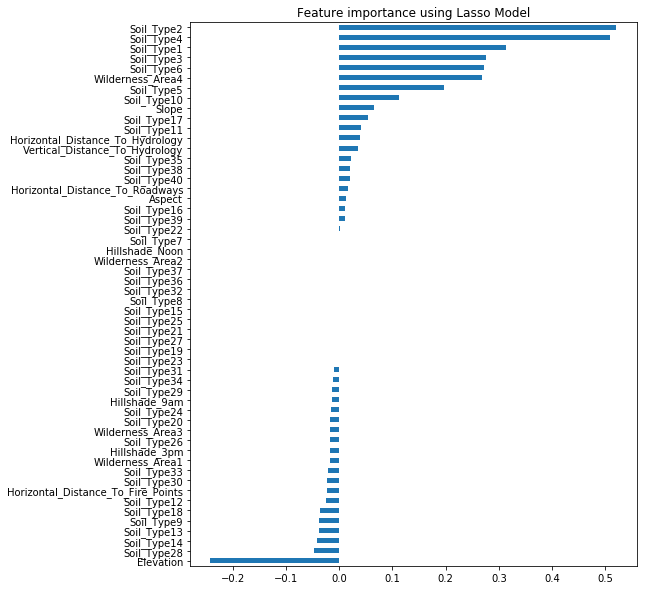

In [13]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Features having value 0 are not important as per the Lasso regression. 
I am focusing on the features it suggests. 

In [18]:
# Getting non zero features from Lasso
lasso_cols = []
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        lasso_cols.append(ds.columns[i])

In [20]:
def test_model(cols):
    #Testing model again
    test_features = features[cols]
    X_train, X_test, y_train, y_test = train_test_split(test_features, target, test_size = 0.2, stratify=target)
    test_forest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
    test_forest.fit(X_train, y_train)
    test_y_predict = test_forest.predict(X_test)

    print("Precision: "+str(precision_score(test_y_predict, y_test)))
    print("Recall: "+str(recall_score(test_y_predict, y_test)))
    print("F1 score: "+str(f1_score(test_y_predict, y_test)))


In [21]:
test_model(lasso_cols)

/home/krazy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision: 0.7953929539295393
Recall: 0.8800599700149925
F1 score: 0.8355871886120996


In [22]:
cols = ['Elevation', 'Wilderness_Area1', 'Wilderness_Area4', 'Horizontal_Distance_To_Roadways', 'Soil_Type4', 
       'Horizontal_Distance_To_Fire_Points', 'Slope', 'Soil_Type29', 'Soil_Type2', 'Soil_Type33']
test_model(cols)

/home/krazy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision: 0.7547425474254743
Recall: 0.8264094955489614
F1 score: 0.7889518413597733
